In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 3. Edge Detection

In [2]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))

Accuracy: 0.621913


## 3.1 Edge Detector 1 - Sobel operator

In [35]:
import glob

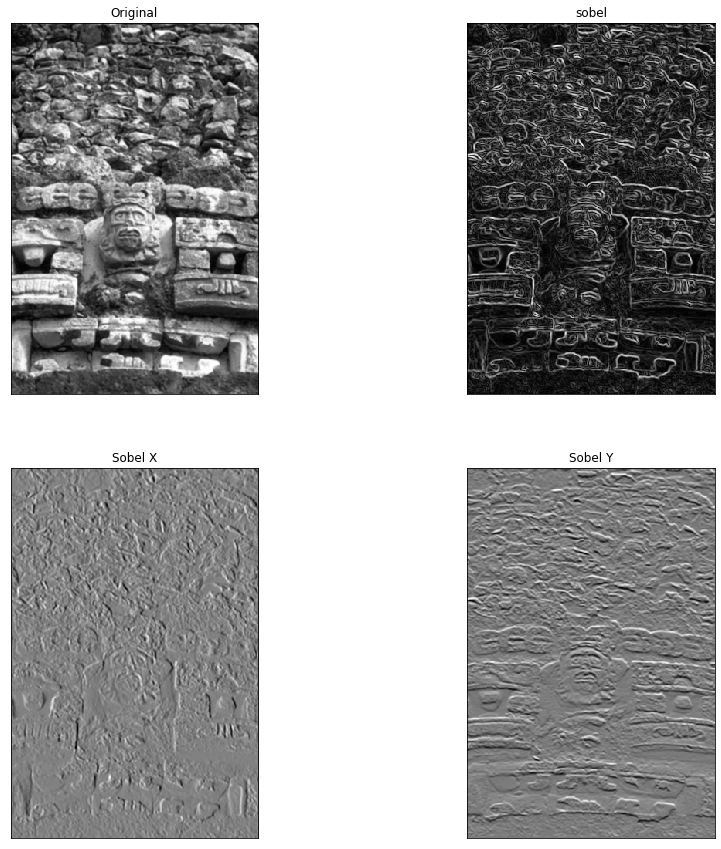


 33039.jpg
Accuracy: 0.377653


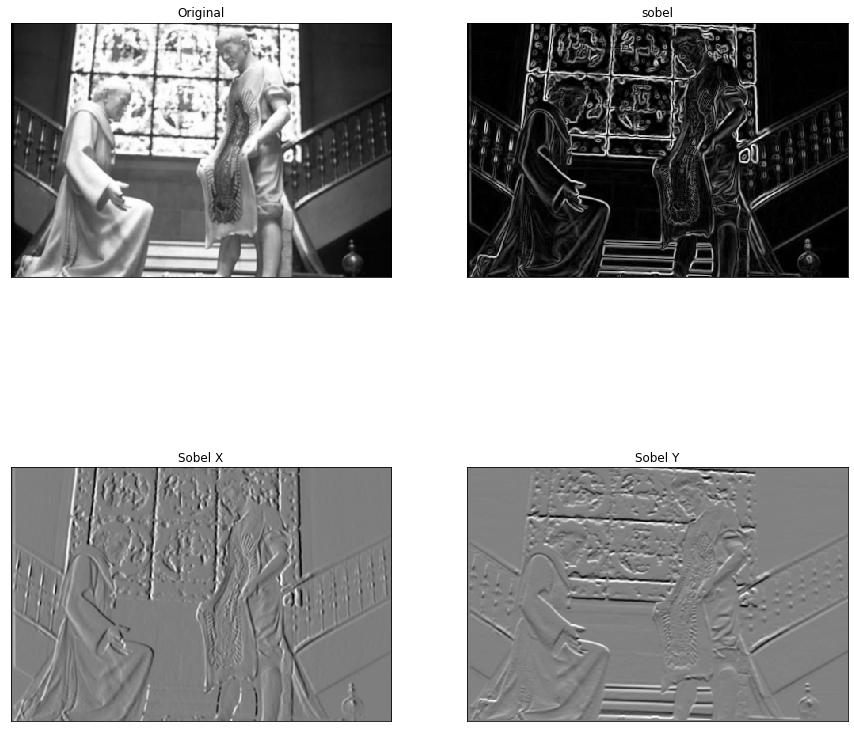


 24077.jpg
Accuracy: 0.524478


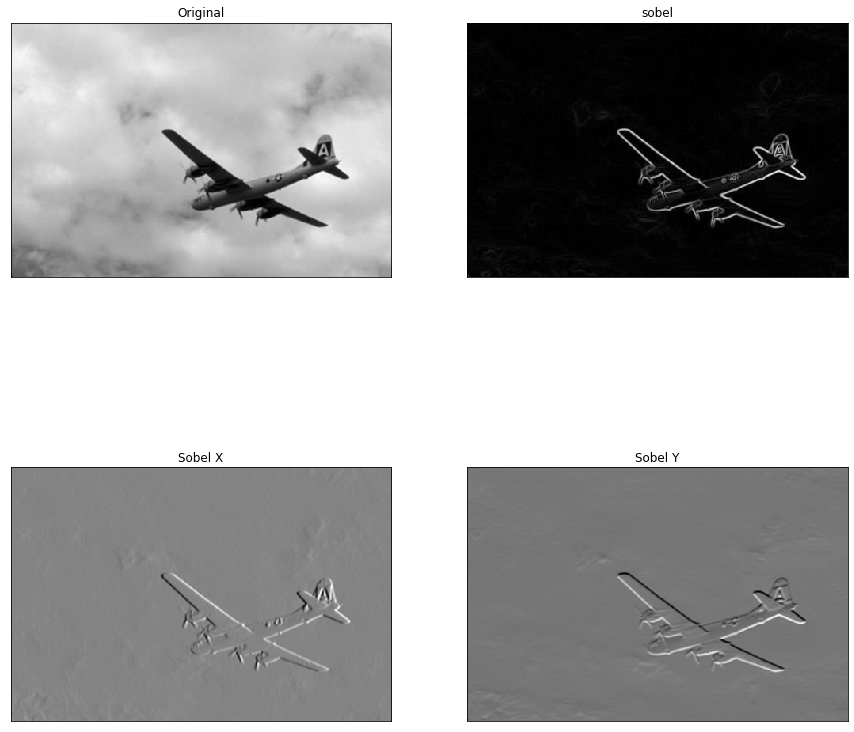


 3096.jpg
Accuracy: 0.852326


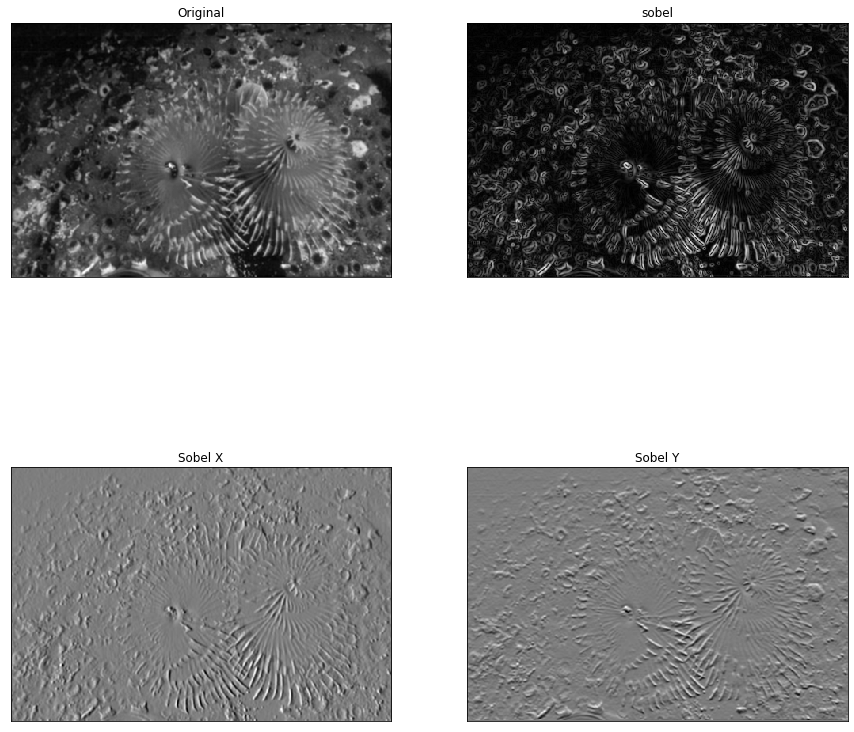


 12084.jpg
Accuracy: 0.581577


In [107]:
### Fill your code here
### Report the accuracy obtained
### Report any improvements you have tried

## Sobel operator

def sobel(imagepath, disp=True):
    # expects a BGR image
    image = cv2.imread(imagepath) # Read the image in color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = cv2.GaussianBlur(image, (3, 3), 0)
    sobelx = cv2.Sobel(image,cv2.CV_64F,1,0) #, ksize=5)
    sobely = cv2.Sobel(image,cv2.CV_64F,0,1) #, ksize=5)
    
    sobel = (sobelx**2 + sobely**2)**(0.5)
    sobel = np.uint8(sobel*255/np.max(sobel))    # into report
    
#     laplacian = cv2.Laplacian(image,cv2.CV_64F)
#     laplacian = np.uint8(laplacian*255/np.max(laplacian))    # into report
    
    
    if disp:
        plt.figure(figsize=(15,15))
        plt.subplot(2,2,1),plt.imshow(image,cmap = 'gray')
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
        plt.title('sobel'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
        plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
        plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
        plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
        plt.show()
    return sobel

imagepaths = glob.glob('data/img/*.jpg')
IMG_NAMES = [os.path.basename(imagepath) for imagepath in imagepaths]
IMG_NAMES = ['33039.jpg', '24077.jpg', '3096.jpg', '12084.jpg']
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img_sobel = sobel(imagepath, disp=True)
    OUTPUT_FILE_PATH = 'pred_' + imagename
    GROUND_TRUTH_PATH = os.path.join('data/ground_truth/', imagename[:-4] + '.bmp')
    
    cv2.imwrite(OUTPUT_FILE_PATH, img_sobel)
    
    print('\n',imagename)
    print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))
#     break

## 3.2 Edge Detector 2 - Canny

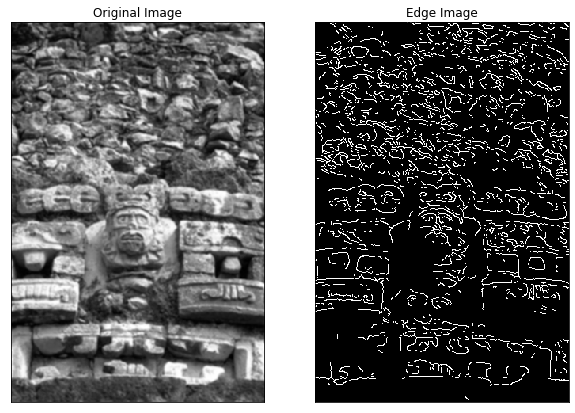


 33039.jpg
Accuracy: 0.343664


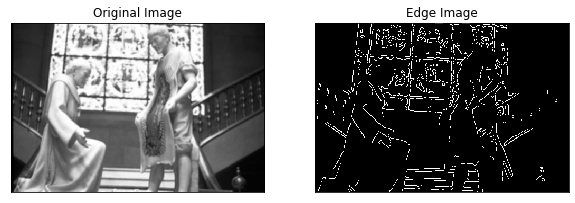


 24077.jpg
Accuracy: 0.503080


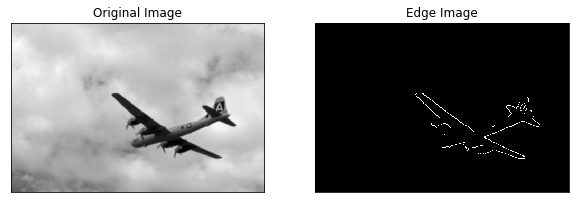


 3096.jpg
Accuracy: 0.845500


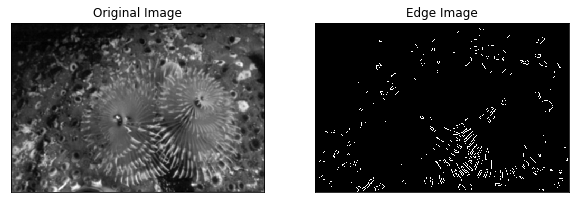


 12084.jpg
Accuracy: 0.629763


In [108]:
def canny(imagepath, disp=True):
    # expects a BGR image
    image = cv2.imread(imagepath) # Read the image in color
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    image = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(image, 200, 254)
#     print(np.max(edges), np.min(edges))
#     edges = np.uint8(edges*255/np.max(edges))    # into report
    
    if disp:
        plt.figure(figsize=(10,10))
        plt.subplot(121),plt.imshow(image,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(edges,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

        plt.show()
    
    return edges

imagepaths = glob.glob('data/img/*.jpg')
IMG_NAMES = [os.path.basename(imagepath) for imagepath in imagepaths]
IMG_NAMES = ['33039.jpg', '24077.jpg', '3096.jpg', '12084.jpg']
# IMG_NAMES = []
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img_canny = canny(imagepath, disp=True)
    OUTPUT_FILE_PATH = 'pred_canny_' + imagename
    GROUND_TRUTH_PATH = os.path.join('data/ground_truth/', imagename[:-4] + '.bmp')
    
    cv2.imwrite(OUTPUT_FILE_PATH, img_canny)
    
    print('\n',imagename)
    print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))
#     break

Tried tuning the threshold as much as possible. each image requires different threshold for best accuracy. Choose the one that gave better accuracy for all the 4 images.

## 3.3 Edge Detector 3 - StructuredForests

### implementation notes

Downloaded the given implementation and trained the model. tested the trained model on the given images for this HW. Results stored at 'StructuredForests/edges/'

Training and testing done using 'python3 StructuredForests.py'. Test results are analyzed below

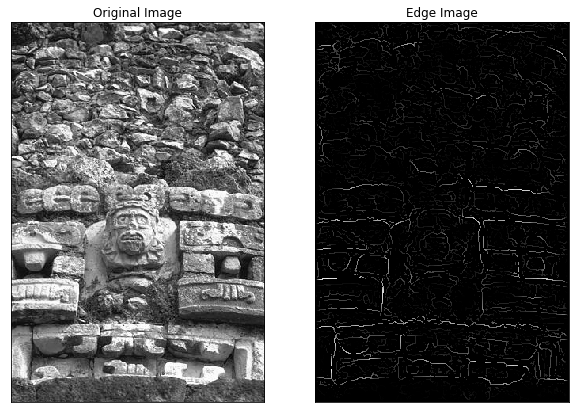


 33039.jpg
Accuracy: 0.813648


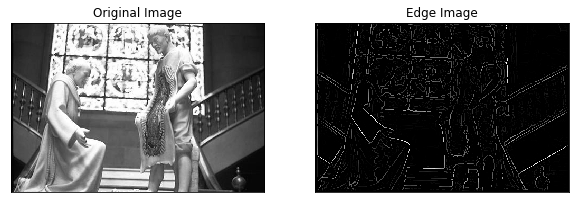


 24077.jpg
Accuracy: 0.564711


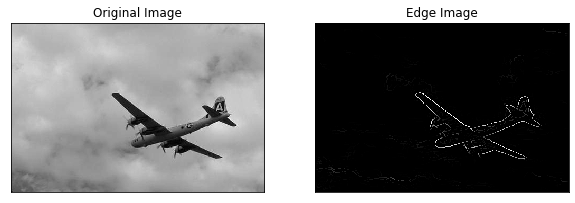


 3096.jpg
Accuracy: 0.846057


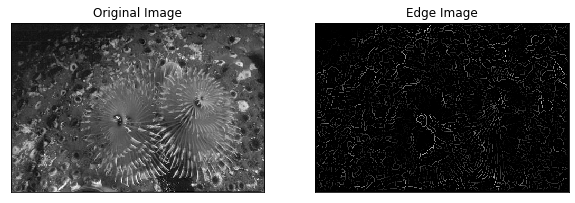


 12084.jpg
Accuracy: 0.670138


In [110]:
imagepaths = glob.glob('data/img/*.jpg')
IMG_NAMES = [os.path.basename(imagepath) for imagepath in imagepaths]
IMG_NAMES = ['33039.jpg', '24077.jpg', '3096.jpg', '12084.jpg']
disp = True
for imagename in IMG_NAMES:
    OUTPUT_FILE_PATH = os.path.join('StructuredForests/edges/', imagename[:-4] + '.png')
    GROUND_TRUTH_PATH = os.path.join('data/ground_truth/', imagename[:-4] + '.bmp')
    
    image = cv2.cvtColor(cv2.imread('data/img/' + imagename), cv2.COLOR_BGR2GRAY)
    edges = cv2.imread(OUTPUT_FILE_PATH, 0)
    if disp:
        plt.figure(figsize=(10,10))
        plt.subplot(121),plt.imshow(image,cmap = 'gray')
        plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(edges,cmap = 'gray')
        plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

        plt.show()
    
    print('\n',imagename)
    print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))

### Discuss any differences between different edge detectors based on what you have learned in class.

Canny edge detector is more robust and optimal when compared to Sobel operator mainly because of Hysteresis Thresholding which rejects most of the false edge detections from the gradients using the two threshold logic.

Although Canny is considered optimal, it also has a few limitations. Setting the lower and upper values to the hysteresis thresholding is a manual process which requires experimentation and visual validation. Hysteresis thresholding values that work well for one image may not work well for another.

Structured forest on the other hadn has a strutured learning framework with random decision forests.To be
more effective, they map structured labels to a discrete set of labels prior to training. For 3 out of the 4 images selected, Structures forest method gives best result in terms of accuracy.

Though accuracy is not a great measure, we are using it here for simplicity. F1-score is a more robust measure for edge detection.